In [1]:
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
# pip install huggingface_hub

Note: you may need to restart the kernel to use updated packages.


In [2]:
import huggingface_hub

In [3]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
huggingface_hub.whoami()

In [ ]:
from datasets import load_dataset
data = load_dataset("/kaggle/input/bangladeshi-folk-musical-instruments-imagedataset/bangladeshi_folk_musical_instruments_images")

README.md:   0%|          | 0.00/781 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/237M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/38.6M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2771 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/489 [00:00<?, ? examples/s]

In [6]:
data

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 2771
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 489
    })
})

In [6]:
train_images = data["train"]["image"]
train_labels = data["train"]["label"]

test_images = data["test"]["image"]
test_labels = data["test"]["label"]

In [7]:
len(train_images)

2771

In [8]:
len(test_images)

489

In [9]:
import numpy as np

In [ ]:

train_labels = data['train']['label']  # Extracting the label column from the train dataset

unique_class_labels = np.unique(train_labels)  
unique_class_labels


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:

from PIL import Image

IMG_SIZE = (128, 128)

# Extracting images properly
train_images = [Image.fromarray(np.array(image)).convert('RGB').resize(IMG_SIZE) for image in data['train']['image']]
test_images = [Image.fromarray(np.array(image)).convert('RGB').resize(IMG_SIZE) for image in data['test']['image']]

# Converting lists to NumPy arrays
train_images = np.array([np.array(image) for image in train_images])
test_images = np.array([np.array(image) for image in test_images])

# Normalizing pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

# Converting labels to NumPy arrays
train_labels = np.array(data['train']['label'])
test_labels = np.array(data['test']['label'])


Basic CNN Model

In [ ]:
from tensorflow.keras import layers, models

# The CNN model
model = models.Sequential()

#  First Convolutional Block
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Block
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Block
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Fourth Convolutional Block 
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Flattening layer
model.add(layers.Flatten())

#Fully Connected Layers
model.add(layers.Dense(256, activation='relu'))  # Hidden Layer
model.add(layers.Dropout(0.5))  # Dropout to prevent overfitting
model.add(layers.Dense(128, activation='relu')) 
model.add(layers.Dropout(0.5))

# 🎯 Output Layer 
num_classes = len(set(train_labels))  
model.add(layers.Dense(num_classes, activation='softmax'))  # Softmax for multi-class


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       4,194,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,617,807 (17.62 MB)

 Trainable params: 4,617,807 (17.62 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(train_images)


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    validation_data=(test_images, test_labels),
                    epochs=30,
                    verbose=1)

Epoch 1/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 15s 133ms/step - accuracy: 0.4315 - loss: 1.6863 - val_accuracy: 0.6074 - val_loss: 1.3282
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.4243 - loss: 1.6916 - val_accuracy: 0.5828 - val_loss: 1.3313
Epoch 3/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.4321 - loss: 1.6869 - val_accuracy: 0.5869 - val_loss: 1.3163
Epoch 4/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.4424 - loss: 1.7097 - val_accuracy: 0.6258 - val_loss: 1.2516
Epoch 5/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.4785 - loss: 1.5857 - val_accuracy: 0.6401 - val_loss: 1.2278
Epoch 6/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.4703 - loss: 1.6101 - val_accuracy: 0.5951 - val_loss: 1.2797
Epoch 7/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.4639 - loss: 1.6050 - val_accuracy: 0.6360 - val_loss: 1.2132
Epoch 8/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.4691 - loss: 1.5559 - val_accu

## 1.6 Evaluate the model

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7278 - loss: 0.9618


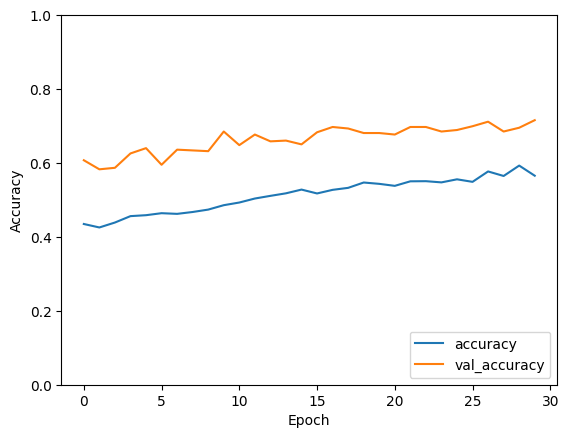

In [16]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=1)

In [17]:
test_acc

0.7157464027404785

In [ ]:
import numpy as np

# Getting predicted probabilities
y_pred_probs = model.predict(test_images)

# Converting probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [ ]:
from sklearn.metrics import classification_report

classification_report(test_labels, y_pred)


'              precision    recall  f1-score   support\n\n           0       0.86      0.69      0.77        26\n           1       0.61      0.73      0.67        26\n           2       0.54      0.47      0.50        32\n           3       0.60      0.25      0.35        24\n           4       0.89      0.61      0.72        28\n           5       0.65      0.68      0.67        38\n           6       0.93      0.80      0.86        54\n           7       0.97      0.85      0.91        34\n           8       0.69      0.89      0.78        37\n           9       0.77      0.85      0.81        27\n          10       0.82      0.78      0.80        36\n          11       0.68      0.53      0.60        32\n          12       0.58      0.82      0.68        34\n          13       0.71      0.97      0.82        37\n          14       0.43      0.50      0.46        24\n\n    accuracy                           0.72       489\n   macro avg       0.72      0.70      0.69       489\nweigh

In [ ]:
labels = data["train"].features["label"].names

label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = i
    id2label[i] = label

y_pred_classnames = [id2label[id] for id in y_pred]
y_true_classnames = [id2label[id] for id in test_labels]

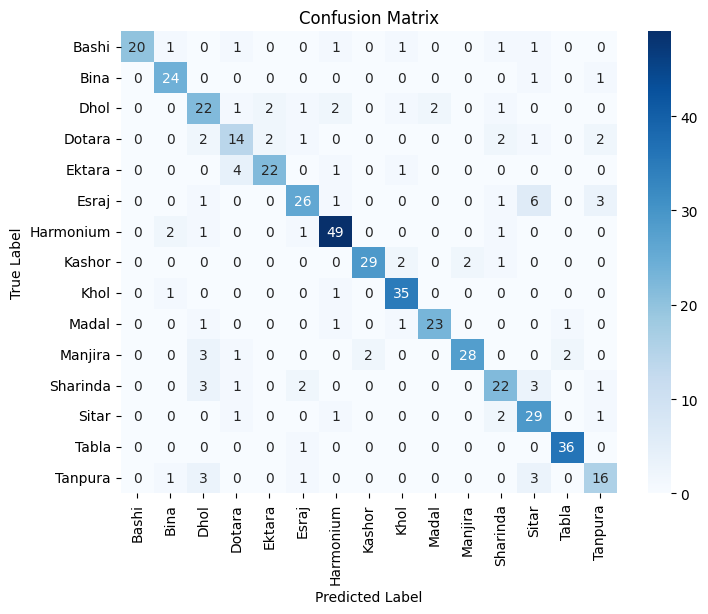

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_true_classnames, y_pred_classnames)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


*VGG16*

VGG16

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))
base_model.trainable = False  

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])


In [ ]:

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_vgg16 = model.fit(train_images, train_labels,  
                             validation_data=(test_images, test_labels),  
                             epochs=20, 
                             batch_size=32,  
                             verbose=1)


Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.6805 - loss: 1.1254 - val_accuracy: 0.8384 - val_loss: 0.6485
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.7935 - loss: 0.7172 - val_accuracy: 0.8691 - val_loss: 0.5443
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.8362 - loss: 0.6008 - val_accuracy: 0.8732 - val_loss: 0.4795
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.8721 - loss: 0.4743 - val_accuracy: 0.8834 - val_loss: 0.4390
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.8997 - loss: 0.3961 - val_accuracy: 0.8875 - val_loss: 0.4214
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9144 - loss: 0.3268 - val_accuracy: 0.8834 - val_loss: 0.4107
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9358 - loss: 0.2666 - val_accuracy: 0.8855 - val_loss: 0.3999
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9400 - loss: 0.2377 - val_accuracy: 0.8937 - v

In [32]:
test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9057 - loss: 0.3434


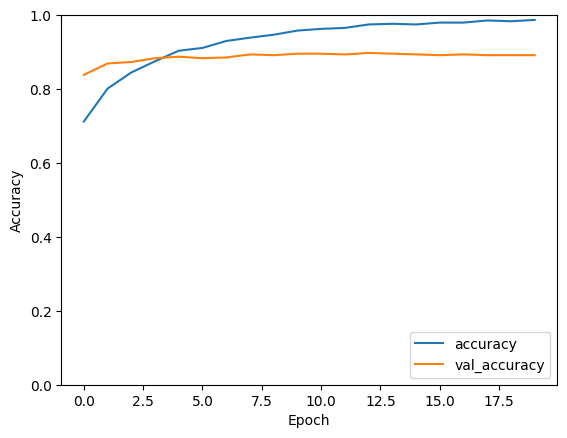

In [ ]:
plt.plot(history_vgg16.history['accuracy'],label='accuracy')
plt.plot(history_vgg16.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [34]:
test_acc

0.8916155695915222

VGG19

In [ ]:
from tensorflow.keras.applications import VGG19

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(128,128,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),  
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_vgg19 = model.fit(train_images, train_labels,  
                             validation_data=(test_images, test_labels),  
                             epochs=20,  
                             batch_size=32,  
                             verbose=1)

Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.2689 - loss: 2.3967 - val_accuracy: 0.7198 - val_loss: 1.1395
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.6600 - loss: 1.1498 - val_accuracy: 0.8016 - val_loss: 0.7693
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.7619 - loss: 0.8464 - val_accuracy: 0.8446 - val_loss: 0.6222
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.8067 - loss: 0.6705 - val_accuracy: 0.8466 - val_loss: 0.5574
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.8401 - loss: 0.5502 - val_accuracy: 0.8528 - val_loss: 0.5290
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.8699 - loss: 0.4677 - val_accuracy: 0.8589 - val_loss: 0.4939
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.9007 - loss: 0.3801 - val_accuracy: 0.8671 - val_loss: 0.4676
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.9093 - loss: 0.3536 - val_accuracy: 0.8712 - 

In [43]:
test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8869 - loss: 0.3509


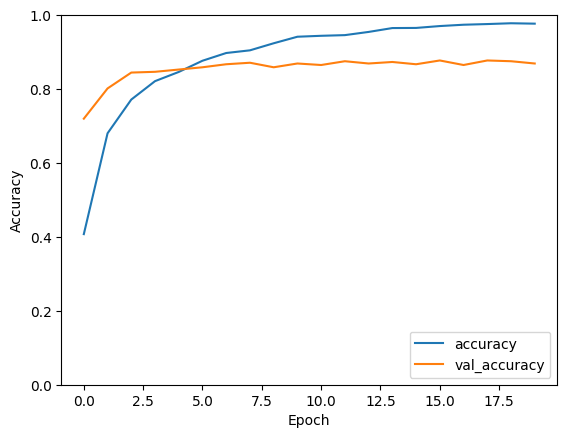

In [ ]:
plt.plot(history_vgg19.history['accuracy'],label='accuracy')
plt.plot(history_vgg19.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [45]:
test_acc

0.8691206574440002

Resnet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Loading ResNet50 with pre-trained ImageNet weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

base_model.trainable = True


model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])


model.compile(optimizer=Adam(learning_rate=0.0001),  
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_resnet = model.fit(train_images, train_labels,  
                    validation_data=(test_images, test_labels),  
                    epochs=30,  
                    batch_size=32,  
                    verbose=1)

Epoch 1/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 89s 419ms/step - accuracy: 0.4169 - loss: 2.0582 - val_accuracy: 0.0777 - val_loss: 2.9428
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - accuracy: 0.8994 - loss: 0.3550 - val_accuracy: 0.0736 - val_loss: 2.7653
Epoch 3/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - accuracy: 0.9596 - loss: 0.1453 - val_accuracy: 0.0961 - val_loss: 2.7973
Epoch 4/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.9716 - loss: 0.0943 - val_accuracy: 0.1043 - val_loss: 2.6873
Epoch 5/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.9848 - loss: 0.0602 - val_accuracy: 0.2536 - val_loss: 2.4342
Epoch 6/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9843 - loss: 0.0580 - val_accuracy: 0.4070 - val_loss: 1.9154
Epoch 7/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9777 - loss: 0.0655 - val_accuracy: 0.6094 - val_loss: 1.4272
Epoch 8/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9727 - loss: 0.0928 - val_accur

In [48]:
test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9279 - loss: 0.5349


In [49]:
test_acc

0.9100204706192017

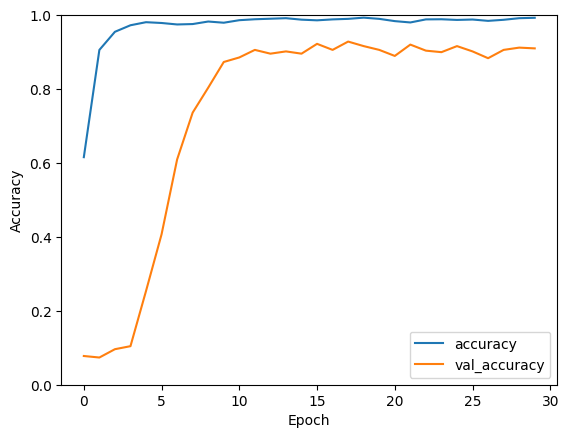

In [ ]:
plt.plot(history_resnet.history['accuracy'],label='accuracy')
plt.plot(history_resnet.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

EfficientNet

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Load EfficientNetB0 with pre-trained ImageNet weights
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers
base_model.trainable = True

# Build the new model on top of EfficientNet
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Better than Flatten to reduce overfitting
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # Change num_classes accordingly
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),  
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_efficientNet= model.fit(train_images, train_labels,  
                             validation_data=(test_images, test_labels),  
                             epochs=10,  
                             batch_size=32,  
                             verbose=1)

In [ ]:
test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=1)

In [ ]:
test_acc

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')